In [5]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [6]:
import matplotlib.pyplot as plt

In [7]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2022-02-21 13:14:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   173MB/s    in 0.4s    

2022-02-21 13:14:06 (173 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [9]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
  
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [11]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [12]:
img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [17]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [19]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [37]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 activation_9 (Activation)   (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 flatten_3 (Flatten)         (None, 90000)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               46080512  
                                                      

In [39]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [40]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Epoch 1/15
50/50 [==============================] - 60s 1s/step - loss: 4.5307 - accuracy: 0.5050 - val_loss: 0.7342 - val_accuracy: 0.5000
Epoch 2/15
50/50 [==============================] - 53s 1s/step - loss: 0.7109 - accuracy: 0.4980 - val_loss: 0.6558 - val_accuracy: 0.5000
Epoch 3/15
50/50 [==============================] - 51s 1s/step - loss: 0.6854 - accuracy: 0.5140 - val_loss: 0.6458 - val_accuracy: 0.5000
Epoch 4/15
50/50 [==============================] - 52s 1s/step - loss: 0.6740 - accuracy: 0.4950 - val_loss: 0.6452 - val_accuracy: 0.5000
Epoch 5/15
50/50 [==============================] - 50s 1s/step - loss: 0.6774 - accuracy: 0.5040 - val_loss: 0.6315 - val_accuracy: 0.5000
Epoch 6/15
50/50 [==============================] - 52s 1s/step - loss: 0.6803 - accuracy: 0.5020 - val_loss: 0.6364 - val_accuracy: 0.5000
Epoch 7/15
50/50 [==============================] - 51s 1s/step - loss: 0.6584 - accuracy: 0.5010 - val_loss: 0.6631 - val_accuracy: 0.5000
Epoch 8/15
50/50 [==

Text(0.5, 1.0, 'Training and validation loss')

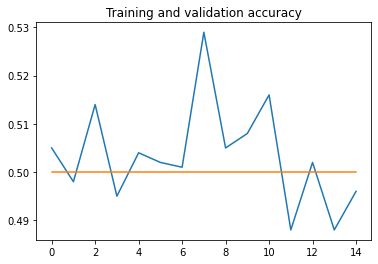

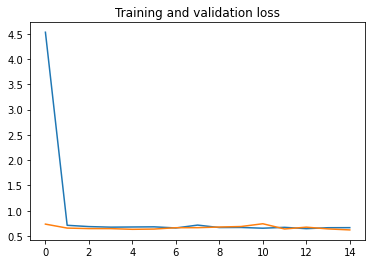

In [41]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')